In [1]:

from nixtlats import TimeGPT
import pandas as pd


In [2]:
timegpt = TimeGPT(
    # defaults to os.environ.get("TIMEGPT_TOKEN")
    token = 'XJlOsi8GJGU8CRABsWM3HXTGWmLSmddgF715lIRxD7ttlH8keqArOXI62IyZH1k5mZll3XWWdBVlcDQK3D7BdBQVMMJhdi0XoHSf0VskGAE9DtEwVT4q8MQb9Ia3gpA6M9Aj6mApX9xa0fSjwOFleUciBffKiPV7MxL46xFGOft1UHv5Grcqa5JED4Osfl3zzX6mWlLKF0GS83KrAEOI1hQfWKdZrDttuLgEG9JugkTlvh38ety9fEWyBpQVT2H9'
)

timegpt.validate_token()


INFO:nixtlats.timegpt:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io


True

In [3]:
# example

df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/air_passengers.csv')
df.head()


,timestamp,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


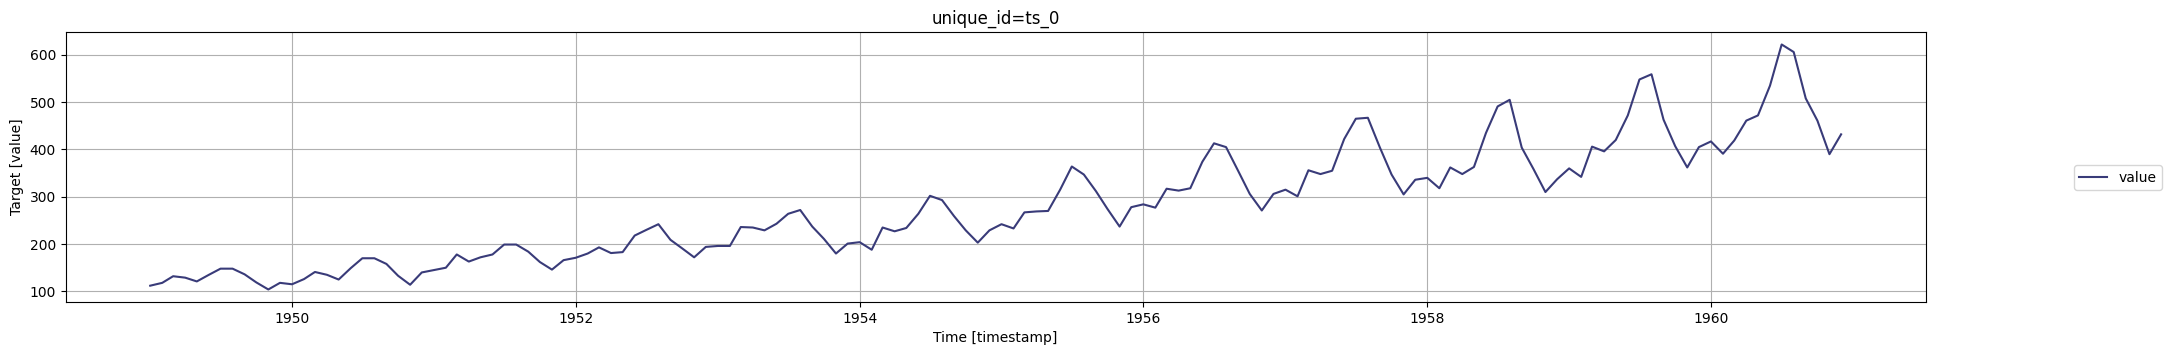

In [4]:

timegpt.plot(df, time_col='timestamp', target_col='value')


In [5]:

timegpt_fcst_df = timegpt.forecast(df=df, h=12, freq='MS', time_col='timestamp', target_col='value')
timegpt_fcst_df.head()


INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


,timestamp,TimeGPT
0,1961-01-01,437.837952
1,1961-02-01,426.062744
2,1961-03-01,463.116577
3,1961-04-01,478.244507
4,1961-05-01,505.646484


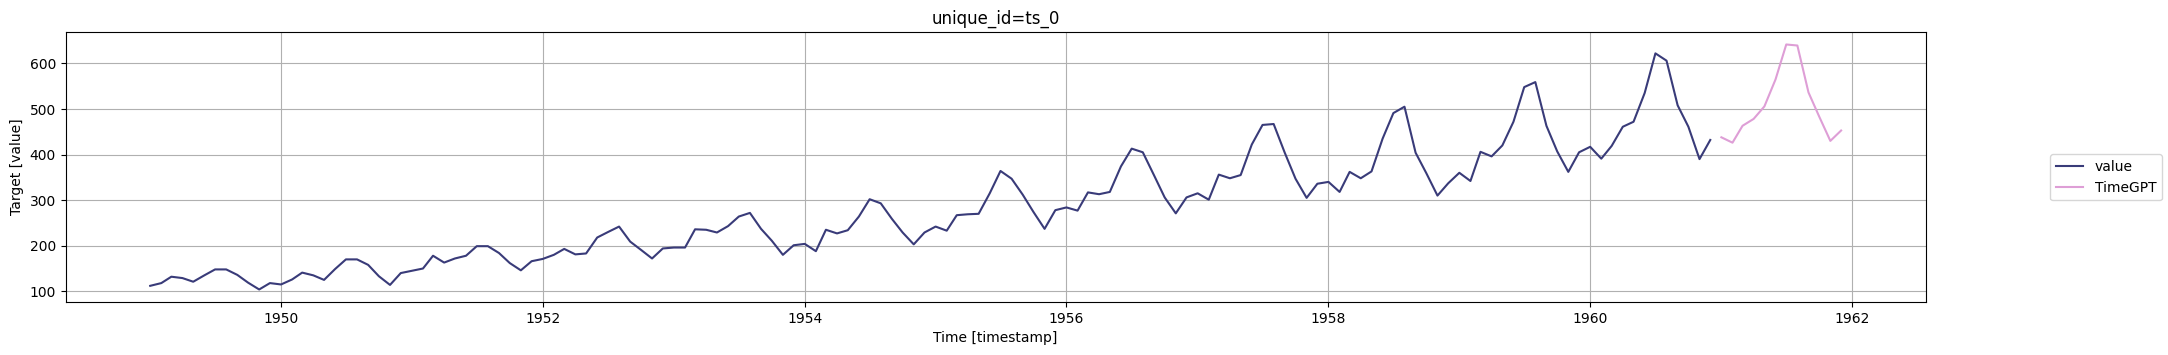

In [6]:

timegpt.plot(df, timegpt_fcst_df, time_col='timestamp', target_col='value')


In [7]:

timegpt_fcst_df = timegpt.forecast(df=df, h=36, time_col='timestamp', target_col='value', freq='MS')
timegpt_fcst_df.head()


INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


,timestamp,TimeGPT
0,1961-01-01,437.837952
1,1961-02-01,426.062744
2,1961-03-01,463.116577
3,1961-04-01,478.244507
4,1961-05-01,505.646484


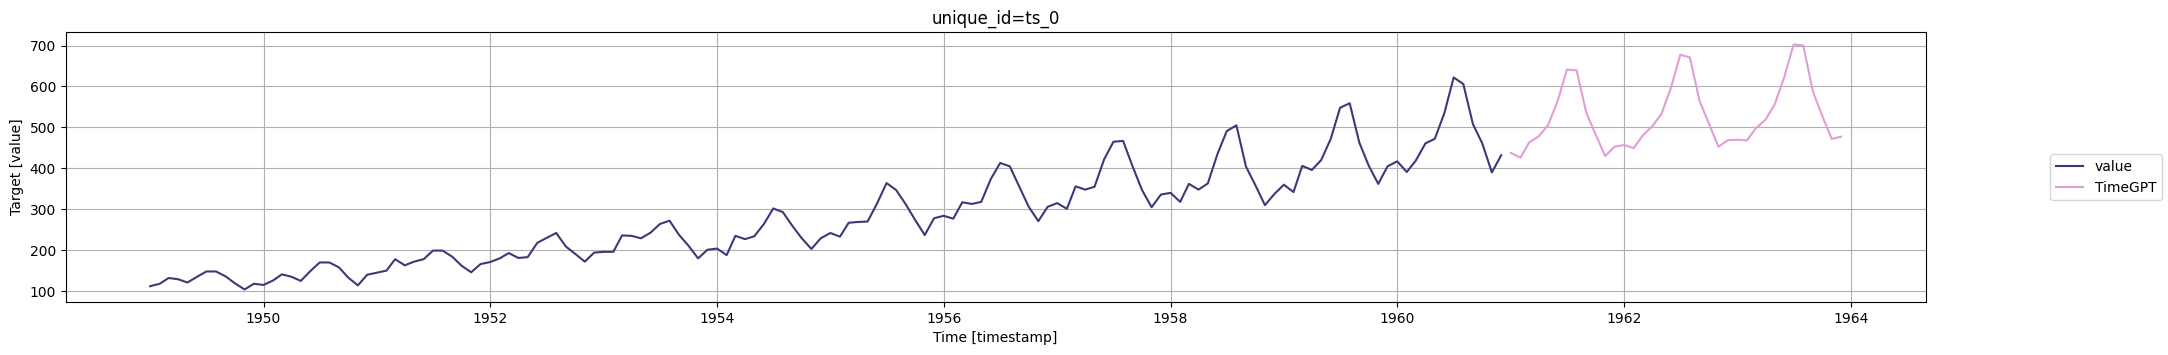

In [8]:

timegpt.plot(df, timegpt_fcst_df, time_col='timestamp', target_col='value')


## Trying with the Cognite data from one sensor

In [9]:
from publicdata import client as c
from functions import *
from datetime import datetime, timezone

sensors = {
    'PDT-92534': 6908033636680653,
    'PT-92523':8877482139815959,
    'TIC-92504':7012228881452176,
    'TT 92532':8152209984966682,
    'FT-92537':7638223843994790,
    'TT-92539':643849686863640,
    'PT-92539':1890487216163163,
    'ZT 92543':4146236330407219,
    'KA 9101':844472910348820
}
sensor_name = "PT-92523"

startdate = datetime(2018, 11, 5, tzinfo=timezone.utc)
enddate = datetime(2018, 11, 15, tzinfo=timezone.utc)
df = c.time_series.data.retrieve_dataframe(id=sensors[sensor_name], 
                                            start=startdate, 
                                            end=enddate,
                                            aggregates=["average"],
                                            granularity="30s",)


print("Data retrieved")

INFO:msal.oauth2cli.authcode:Open a browser on this device to visit: https://login.microsoftonline.com/48d5043c-cf70-4c49-881c-c638f5796997/oauth2/v2.0/authorize?client_id=1b90ede3-271e-401b-81a0-a4d52bea3273&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A53000&scope=https%3A%2F%2Fapi.cognitedata.com%2F.default+offline_access+openid+profile&state=WfhztTkAHyoGFgil&code_challenge=cNDvnYzwSwJNGQRqd8YxX2blkdgtsokDsgdEy5LU0TI&code_challenge_method=S256&nonce=168b8a1b6b2f78f0d8a758aa919cf5dd8503db0232216c75ad19b0f59926891f&client_info=1


Data retrieved


In [17]:
std_df,_,_ = standardize_df(df)
reshaped_df = reshape_df(std_df)
reset_res = reshaped_df.reset_index()
reset_res = reset_res.rename(columns={"index": "time", "pi:160699|average": "value"})
reset_res.head()

# print(f'Original shape: {std_df.shape} Resampled shape: {reset_res.shape}')

,time,value
0,2018-11-05 00:00:00,-1.220214
1,2018-11-05 00:00:30,0.407482
2,2018-11-05 00:01:00,-0.684752
3,2018-11-05 00:01:30,-0.953851
4,2018-11-05 00:02:00,0.093045


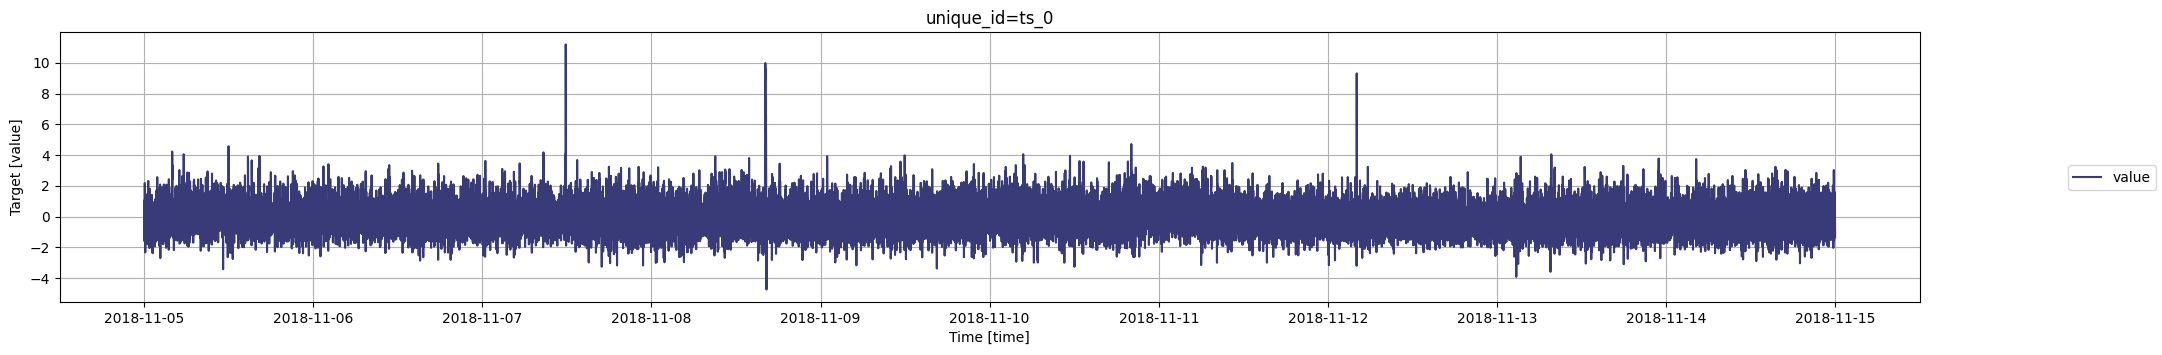

In [18]:
timegpt.plot(reset_res, time_col='time', target_col='value')

INFO:nixtlats.timegpt:Validating inputs...


INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


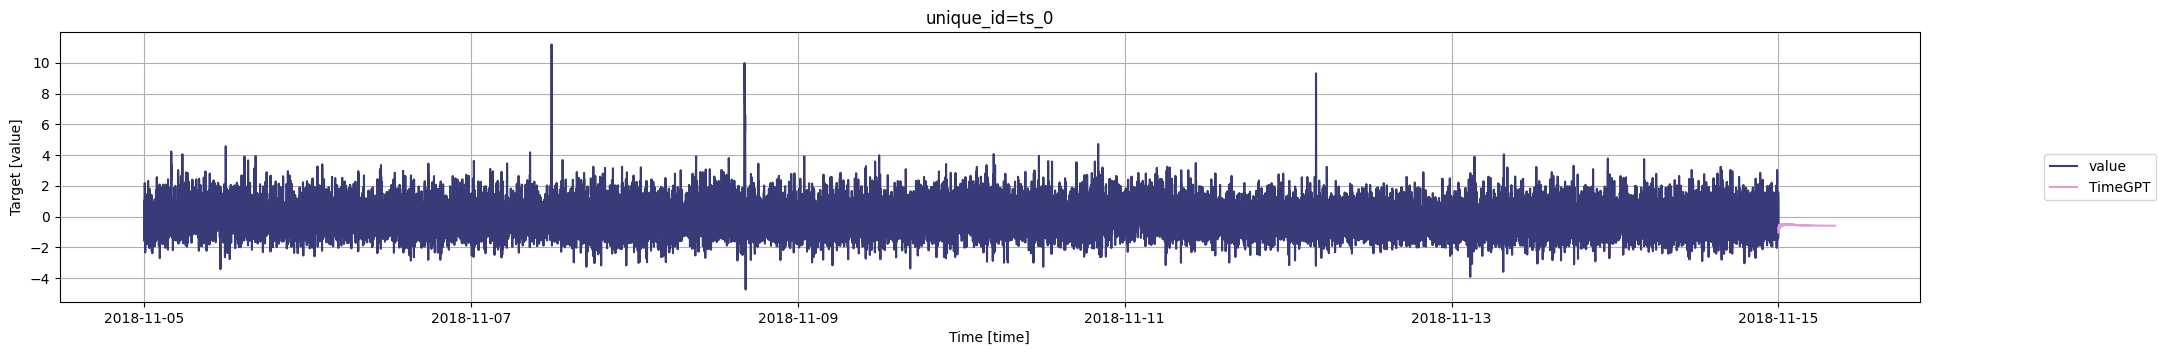

In [30]:
fcst_pltr_levels_df = timegpt.forecast(
    df=reset_res, h=1000, freq='30s',
    time_col='time', target_col='value'
)

timegpt.plot(
    reset_res, 
    fcst_pltr_levels_df, 
    time_col='time',
    target_col='value',
)

## Conclusion
Doesnt really work with our data, and it struggles with genereating more than 1000 samples.